# Red convolutiva para el reconocimiento de FASHION MNIST

In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

### 

### Red convolutiva

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Entrada 28x28
#Salida 26x26

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

### Datos

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Programa

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images,test_labels))

Epoch 1/20
938/938 [==============================] - 33s 21ms/step - loss: 0.6631 - accuracy: 0.7564 - val_loss: 0.5352 - val_accuracy: 0.7993
Epoch 2/20
938/938 [==============================] - 16s 17ms/step - loss: 0.4423 - accuracy: 0.8378 - val_loss: 0.4392 - val_accuracy: 0.8398
Epoch 3/20
938/938 [==============================] - 17s 18ms/step - loss: 0.3787 - accuracy: 0.8605 - val_loss: 0.4166 - val_accuracy: 0.8421
Epoch 4/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3380 - accuracy: 0.8740 - val_loss: 0.3996 - val_accuracy: 0.8569
Epoch 5/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3096 - accuracy: 0.8860 - val_loss: 0.3462 - val_accuracy: 0.8744
Epoch 6/20
938/938 [==============================] - 17s 18ms/step - loss: 0.2856 - accuracy: 0.8943 - val_loss: 0.3354 - val_accuracy: 0.8795
Epoch 7/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2656 - accuracy: 0.9012 - val_loss: 0.3459 - val_accuracy:

### Representación gráfica

In [8]:
import matplotlib.pyplot as plt

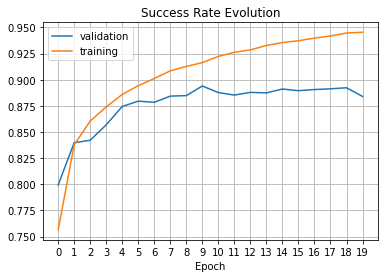

In [9]:
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.legend()
plt.title('Success Rate Evolution')
plt.xlabel('Epoch')
plt.grid()
plt.xticks(history.epoch)
plt.show()